In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

#One-Hote Encoding für die Label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))

#10 Ausgänge
model.add(Dense(10, activation="sigmoid"))

#Loss-Funktion wird an die Ausgänge angepasst
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8693
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8706
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8702
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8713
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8705
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8712
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3788 - accuracy: 0.8712
Epoch 8/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3775 - accuracy: 0.8722
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8719
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8722


In [25]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 550us/step - loss: 0.4511 - accuracy: 0.8422


[0.45112887024879456, 0.842199981212616]

In [26]:
model.predict(X_test.reshape(-1, 784))

array([[3.09962525e-05, 1.26570463e-04, 8.38047345e-05, ...,
        1.87584460e-02, 3.38226557e-04, 4.48085964e-02],
       [1.11797452e-03, 6.84449114e-05, 1.38477176e-01, ...,
        2.60798879e-05, 3.03328037e-04, 7.97365938e-05],
       [1.49208307e-03, 4.72959191e-01, 5.14507294e-04, ...,
        2.87115574e-04, 2.04950571e-04, 9.70660403e-05],
       ...,
       [2.08538771e-03, 2.82183992e-05, 6.11950891e-05, ...,
        1.64896250e-04, 7.55499899e-02, 1.08922170e-04],
       [2.77847052e-04, 3.02552342e-01, 6.55055046e-04, ...,
        3.84092331e-04, 5.30397920e-05, 2.44081020e-04],
       [4.40960030e-05, 1.26421452e-04, 1.74432993e-04, ...,
        8.98835063e-03, 2.79745460e-03, 1.12891685e-04]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


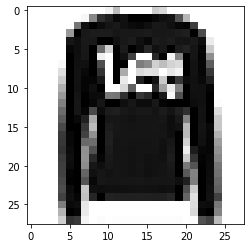

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [28]:
pred = model.predict(X_test.reshape(-1, 784))

In [30]:
import numpy as np

np.argmax(pred[1])

2